# ASSIGNMENT - MODEL SELECTION

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

# 1. Load the dataset into python environment

In [2]:
data=pd.read_csv(r"C:\Users\jenan\Downloads\titanic_dataset .csv")

In [3]:
#To display the first 5 rows of the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Making 'PassengerId' as the index column
data=data.set_index('PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Checking the basic details of the dataset

In [5]:
#To find the number of rows and columns in the dataset
data.shape

(891, 11)

In [6]:
#To find the column names
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
#To get informations such as number of columns,column names,number of non-null cells in each column,datatype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
#To get statistical summary of numerical columns
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Visualization of the dataset

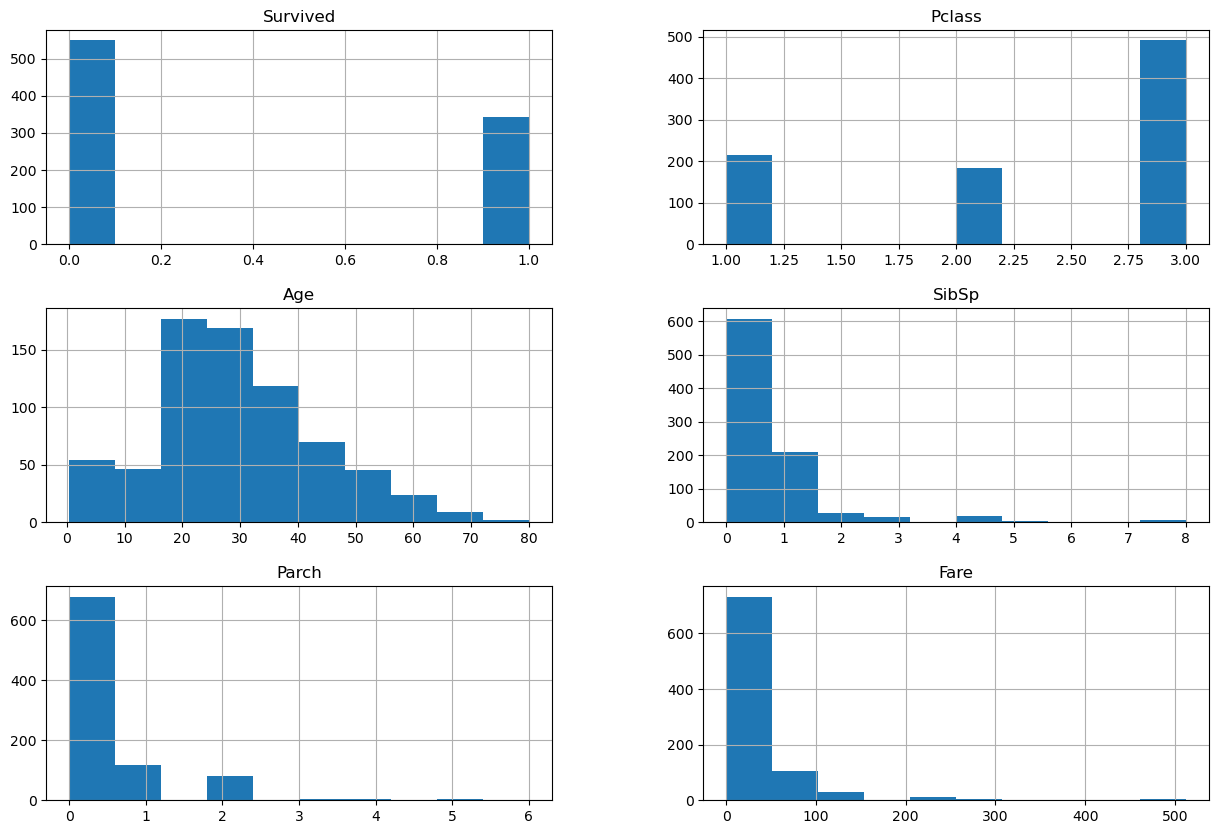

In [9]:
#Plotting histogram to analyse the distribution of numerical features
data.hist(figsize = (15,10))
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

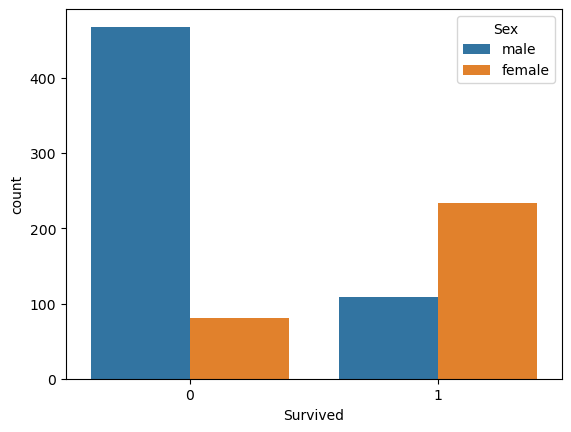

In [10]:
#Countplot to analyse the survival of male and female
sns.countplot(x='Survived',data=data,hue='Sex')

We can see that a larger number of males did not survive and the number of females who survived is more than the number of males who survived.

<Axes: xlabel='Survived', ylabel='count'>

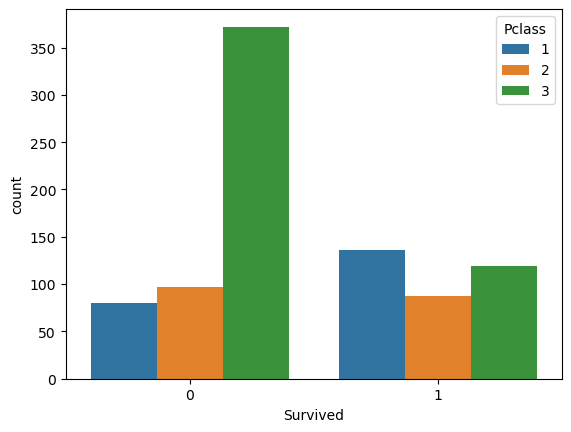

In [11]:
#Countplot to analyse the survival based on 'Pclass'
sns.countplot(x='Survived',data=data,hue='Pclass')

We can see that a larger number of 3rd class did not survive.

<Axes: xlabel='Survived', ylabel='count'>

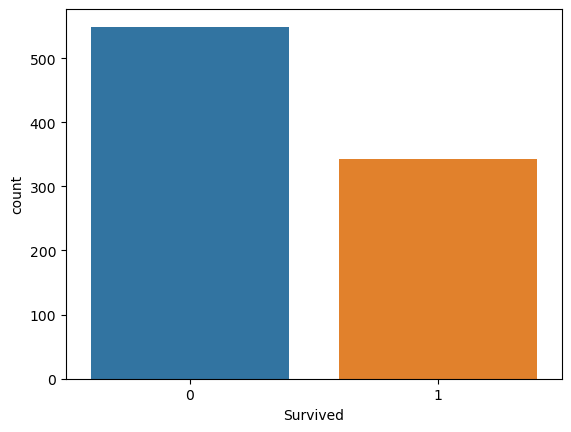

In [12]:
#Countplot to show the number of people who survived and who didn't survive
sns.countplot(x='Survived',data=data)

We can see that a larger number of people did not survive.

# 2. Do all the necessary pre-processing steps

# Data imputation

In [13]:
#Finding the number of null values in each column
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

There are 177 missing values in 'Age', 687 missing values in 'Cabin' and 2 missing values in 'Embarked'.

In [14]:
#Filling missing values in the column 'Age' with median
data['Age']=data['Age'].fillna(data['Age'].median())

In [15]:
#Checking whether there is any missing value in 'Age' after filling
data['Age'].isna().sum()

0

In [16]:
#Filling missing values in the column 'Cabin' using forward fill method
data['Cabin']=data['Cabin'].fillna(method='ffill')

In [17]:
#Checking whether there is any missing value in 'Cabin' after filling
data['Cabin'].isna().sum()

1

There is still one missing value in the column 'Cabin'.

In [18]:
#Filling the remaining missing value in the column 'Cabin' using backward fill method
data['Cabin']=data['Cabin'].fillna(method='bfill')

In [19]:
data['Cabin'].isna().sum()

0

Now, there is no missing value in the column 'Cabin'.

In [20]:
#Filling missing values in the column 'Embarked' with mode
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [21]:
#Checking whether there is any missing value in 'Embarked' after filling
data['Embarked'].isna().sum()

0

In [22]:
#Checking for null values after data imputation
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# Outlier detection and handling

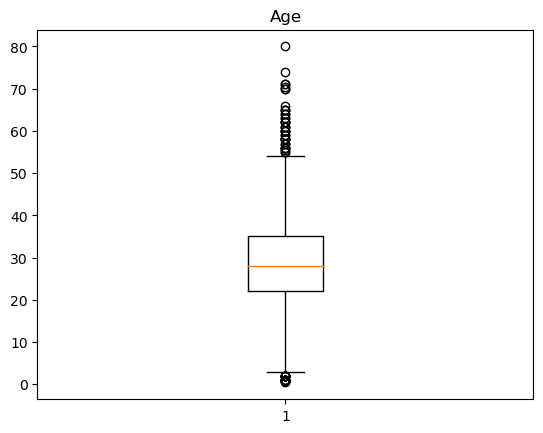

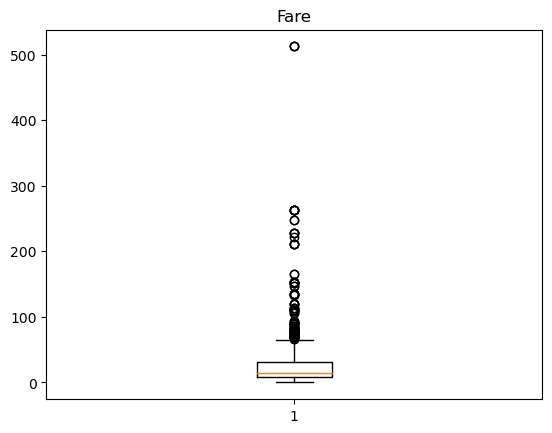

In [23]:
#Checking outliers in the columns'Age' and Fare'
col=['Age','Fare']
for i in col:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)
plt.show()

In [24]:
#To find the outliers in 'Age'
Q1=np.percentile(data['Age'],25,method='midpoint')
Q2=np.percentile(data['Age'],50,method='midpoint')
Q3=np.percentile(data['Age'],75,method='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("First quartile,Q1 =",Q1)
print("Second quartile,Q2 =",Q2)
print("Third quartile,Q3 =",Q3)
print("Inter quartile range =",IQR)
print("Lower limit =",low_lim)
print("Upper limit =",up_lim)

outlier=[]
for i in data['Age']:
    if (i>up_lim)or(i<low_lim):
        outlier.append(i)
print("Outliers are ",outlier)


First quartile,Q1 = 22.0
Second quartile,Q2 = 28.0
Third quartile,Q3 = 35.0
Inter quartile range = 13.0
Lower limit = 2.5
Upper limit = 54.5
Outliers are  [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


Since there are some outliers below the lower limit which are decimal values and outliers above the upper limit cannot be considered as outliers here as the highest value of age is 80, we remove only the outliers below the lower limit.

In [25]:
#To get index of the outliers below the lower limit
ind_1=data['Age']<low_lim
data.loc[ind_1].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [26]:
#Removing outliers below the lower limit
data.drop([8, 17, 79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],inplace=True)

Since the column 'Fare' consists of the ticket fares of three different classes, we handle the outliers in 'Fare' considering the outliers in 'Fare' of each class.

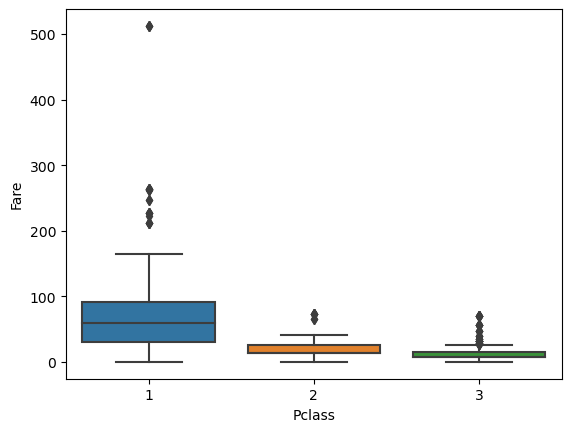

In [27]:
#Boxplot to check the outliers in 'Fare' if we split it acoording to 'Pclass'
import seaborn as sns
sns.boxplot(y='Fare',x='Pclass',data=data)
plt.show()

In [28]:
#To group data according to 'Pclass'
data1=data.groupby('Pclass').get_group(1)
data2=data.groupby('Pclass').get_group(2)
data3=data.groupby('Pclass').get_group(3)

In [29]:
#To find the outliers in 'Fare' of 'Pclass' 1
Q1=np.percentile(data1['Fare'],25,method='midpoint')
Q2=np.percentile(data1['Fare'],50,method='midpoint')
Q3=np.percentile(data1['Fare'],75,method='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("First quartile,Q1 =",Q1)
print("Second quartile,Q2 =",Q2)
print("Third quartile,Q3 =",Q3)
print("Inter quartile range =",IQR)
print("Lower limit =",low_lim)
print("Upper limit =",up_lim)

outlier=[]
for i in data1['Fare']:
    if (i>up_lim)or(i<low_lim):
        outlier.append(i)
print("Outliers are ",outlier)


First quartile,Q1 = 30.8479
Second quartile,Q2 = 58.6896
Third quartile,Q3 = 91.0792
Inter quartile range = 60.231300000000005
Lower limit = -59.49905000000001
Upper limit = 181.42615
Outliers are  [263.0, 263.0, 247.5208, 512.3292, 247.5208, 262.375, 263.0, 211.5, 227.525, 263.0, 221.7792, 227.525, 512.3292, 211.3375, 227.525, 227.525, 211.3375, 512.3292, 262.375, 211.3375]


In [30]:
#To get the index of the outliers
ind=data1['Fare']>up_lim
data1.loc[ind].index

Int64Index([ 28,  89, 119, 259, 300, 312, 342, 378, 381, 439, 528, 558, 680,
            690, 701, 717, 731, 738, 743, 780],
           dtype='int64', name='PassengerId')

In [31]:
#Removing the outliers
data.drop([28,  89, 119, 259, 300, 312, 342, 378, 381, 439, 528, 558, 680, 690, 701, 717, 731, 738, 743, 780],inplace=True)

In [32]:
#To find the outliers in 'Fare' of 'Pclass' 2
Q1=np.percentile(data2['Fare'],25,method='midpoint')
Q2=np.percentile(data2['Fare'],50,method='midpoint')
Q3=np.percentile(data2['Fare'],75,method='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("First quartile,Q1 =",Q1)
print("Second quartile,Q2 =",Q2)
print("Third quartile,Q3 =",Q3)
print("Inter quartile range =",IQR)
print("Lower limit =",low_lim)
print("Upper limit =",up_lim)

outlier=[]
for i in data2['Fare']:
    if (i>up_lim)or(i<low_lim):
        outlier.append(i)
print("Outliers are ",outlier)


First quartile,Q1 = 13.0
Second quartile,Q2 = 13.7917
Third quartile,Q3 = 26.0
Inter quartile range = 13.0
Lower limit = -6.5
Upper limit = 45.5
Outliers are  [73.5, 73.5, 73.5, 65.0, 73.5, 73.5, 65.0]


In [33]:
#To get the index of the outliers
ind=data2['Fare']>up_lim
data2.loc[ind].index

Int64Index([73, 121, 386, 616, 656, 666, 755], dtype='int64', name='PassengerId')

In [34]:
#Removing the outliers
data.drop([73, 121, 386, 616, 656, 666, 755],inplace=True)

In [35]:
#To find the outliers in 'Fare' of 'Pclass' 3
Q1=np.percentile(data3['Fare'],25,method='midpoint')
Q2=np.percentile(data3['Fare'],50,method='midpoint')
Q3=np.percentile(data3['Fare'],75,method='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("First quartile,Q1 =",Q1)
print("Second quartile,Q2 =",Q2)
print("Third quartile,Q3 =",Q3)
print("Inter quartile range =",IQR)
print("Lower limit =",low_lim)
print("Upper limit =",up_lim)

outlier=[]
for i in data3['Fare']:
    if (i>up_lim)or(i<low_lim):
        outlier.append(i)
print("Outliers are ",outlier)


First quartile,Q1 = 7.75
Second quartile,Q2 = 8.05
Third quartile,Q3 = 15.2458
Inter quartile range = 7.495799999999999
Lower limit = -3.4936999999999987
Upper limit = 26.4895
Outliers are  [31.275, 31.3875, 39.6875, 46.9, 27.9, 46.9, 56.4958, 34.375, 34.375, 69.55, 27.9, 56.4958, 29.125, 69.55, 31.3875, 69.55, 31.3875, 31.3875, 39.6875, 29.125, 69.55, 27.9, 34.375, 46.9, 56.4958, 31.275, 31.275, 31.275, 27.9, 39.6875, 56.4958, 46.9, 46.9, 39.6875, 56.4958, 34.375, 29.125, 69.55, 31.275, 27.9, 56.4958, 56.4958, 69.55, 31.275, 69.55, 29.125]


In [36]:
#To get the index of the outliers
ind=data3['Fare']>up_lim
data3.loc[ind].index

Int64Index([ 14,  26,  51,  60,  64,  72,  75,  87, 148, 160, 168, 170, 172,
            181, 183, 202, 234, 262, 267, 279, 325, 361, 437, 481, 510, 542,
            543, 611, 635, 639, 644, 679, 684, 687, 693, 737, 788, 793, 814,
            820, 827, 839, 847, 851, 864, 886],
           dtype='int64', name='PassengerId')

In [37]:
#Removing the outliers
data.drop([ 14,  26,  51,  60,  64,  72,  75,  87, 148, 160, 168, 170, 172,
            181, 183, 202, 234, 262, 267, 279, 325, 361, 437, 481, 510, 542,
            543, 611, 635, 639, 644, 679, 684, 687, 693, 737, 788, 793, 814,
            820, 827, 839, 847, 851, 864, 886],inplace=True)

In [38]:
#Removing unwanted columns
data=data.drop(['Name','Ticket','Cabin'],axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,28.0,1,2,23.4500,S


# Encoding

In [39]:
#Label encoding categorical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['Embarked']=le.fit_transform(data['Embarked'])
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,2
888,1,1,0,19.0,0,0,30.0000,2
889,0,3,0,28.0,1,2,23.4500,2


# Checking Correlation

In [40]:
#Correlation matrix
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.332338,-0.585652,-0.067890,0.135796,0.199777,0.345828,-0.147950
Pclass,-0.332338,1.000000,0.139324,-0.354353,-0.073140,-0.082962,-0.712025,0.129552
Sex,-0.585652,0.139324,1.000000,0.103488,-0.216047,-0.266800,-0.262638,0.109976
Age,-0.067890,-0.354353,0.103488,1.000000,-0.065006,-0.127734,0.199648,-0.003323
SibSp,0.135796,-0.073140,-0.216047,-0.065006,1.000000,0.246344,0.245326,-0.026835
Parch,0.199777,-0.082962,-0.266800,-0.127734,0.246344,1.000000,0.235461,-0.019330
Fare,0.345828,-0.712025,-0.262638,0.199648,0.245326,0.235461,1.000000,-0.225428
Embarked,-0.147950,0.129552,0.109976,-0.003323,-0.026835,-0.019330,-0.225428,1.000000


<Axes: >

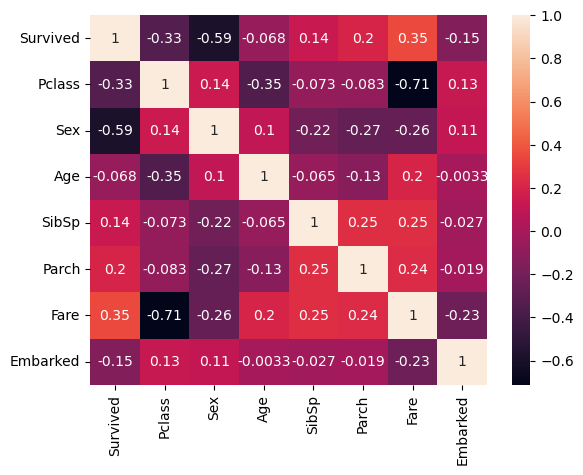

In [41]:
#Correlation heatmap
sns.heatmap(data.corr(),annot=True)

# 3. Create kNN and SVM models

# Defining the dependent and independent variables

In [42]:
x=data.drop(['Survived'],axis=1)
y=data['Survived']

# Scaling

In [43]:
#Doing standard scaling on the feature set
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
x=std_scaler.fit_transform(x)
x=pd.DataFrame(x)

# Splitting the data into train data and test data

In [44]:
#Splitting the data in such a way that 70% data is for training and 30% is for testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

# KNN MODEL

In [45]:
from sklearn.neighbors import KNeighborsClassifier

#To choose the best value for K by finding the accuracy scores of the model for K values ranging from 3 to 14
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)
print("Accuracy scores for K values ranging from 3 to 14 : \n",metric_k)

Accuracy scores for K values ranging from 3 to 14 : 
 [0.7907949790794979, 0.8158995815899581, 0.803347280334728, 0.8158995815899581, 0.7824267782426778, 0.8117154811715481, 0.7907949790794979, 0.803347280334728, 0.7949790794979079, 0.7949790794979079, 0.8075313807531381, 0.799163179916318]


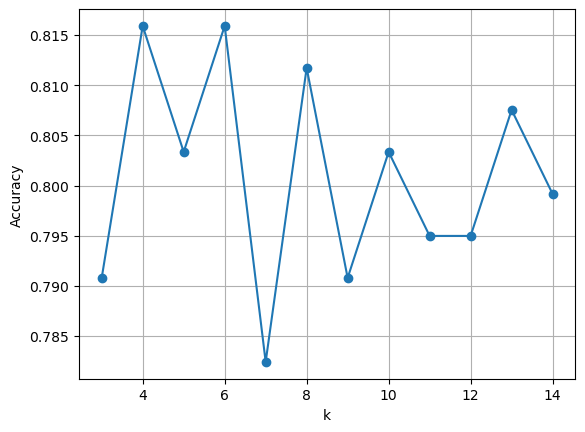

In [46]:
#Plotting the accuracy scores to find the best k value
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel("Accuracy")
plt.grid()

kNN model has highest accuracy for k values 4 and 6.So we choose k to be 4

# Model Training

In [47]:
#Defining and training(fitting) the KNN model with k=4 using train data
classifier=KNeighborsClassifier(n_neighbors=4,metric='euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [48]:
#Predicting the output for the test data using the fitted model
y_pred=classifier.predict(x_test)

# Model Evaluation

In [49]:
#Evaluating the model using confusion matrix
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred))

Confusion matrix : 
 [[140  10]
 [ 34  55]]


In [50]:
#Evaluating the model using the metric,accuracy score
knn_acc=accuracy_score(y_test,y_pred)
print("Accuracy score :",knn_acc)
print(f"Accuracy of kNN model is {knn_acc*100:.2f}%")


Accuracy score : 0.8158995815899581
Accuracy of kNN model is 81.59%


# SVM MODEL

# Model Training

In [51]:
#Defining and training(fitting) the SVM model with linear kernel using train data
from sklearn.svm import SVC
svm_cls=SVC(kernel='linear')
svm_cls=svm_cls.fit(x_train,y_train)

In [52]:
#Predicting the output for the test data using the fitted model
y_pred_svm=svm_cls.predict(x_test)

# Model Evaluataion

In [53]:
#Evaluating the model using confusion matrix
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred_svm))

Confusion matrix : 
 [[134  16]
 [ 26  63]]


In [54]:
#Evaluating the model using the metric,accuracy score
svm_acc=accuracy_score(y_test,y_pred_svm)
print("Accuracy score :",svm_acc)
print(f"Accuracy of SVM model is {svm_acc*100:.2f}%")


Accuracy score : 0.8242677824267782
Accuracy of SVM model is 82.43%


# 4. Do k-fold and stratified k-fold cross validation techniques and   find the average accuracy score of the models

# K-FOLD CROSS VALIDATION

In [55]:
#K-fold cross valdation taking k=20
from sklearn.model_selection import KFold
k = KFold(20)
for train_index,test_index in k.split(x,y):
  print('Training Index',train_index)
  print('Test Index',test_index)

Training Index [ 40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255
 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273
 274 275 276 277 278 279 280 281 282

# Finding average accuracy score of kNN Model

In [56]:
#Finding k-fold cross validation scores of kNN model
from sklearn.model_selection import cross_val_score
knn_cv_result = cross_val_score(classifier,x,y,cv=k)
print("Cross validation scores :\n",knn_cv_result)

Cross validation scores :
 [0.625      0.85       0.85       0.875      0.75       0.775
 0.75       0.775      0.875      0.825      0.8        0.825
 0.8        0.825      0.76923077 0.74358974 0.87179487 0.79487179
 0.79487179 0.71794872]


In [57]:
#Finding average accuracy score of kNN model using k-fold cross validation technique
print("Average accuracy score :",np.mean(knn_cv_result))
print(f"Average accuracy of kNN model is {np.mean(knn_cv_result)*100:.2f}%")

Average accuracy score : 0.7946153846153847
Average accuracy of kNN model is 79.46%


# Finding average accuracy score of SVM Model

In [58]:
#Finding k-fold cross validation scores of SVM model
svm_cv_result = cross_val_score(svm_cls,x,y,cv=k)
print("Cross validation scores :\n",svm_cv_result)

Cross validation scores :
 [0.75       0.9        0.775      0.9        0.775      0.75
 0.8        0.925      0.775      0.725      0.8        0.8
 0.75       0.8        0.74358974 0.79487179 0.84615385 0.8974359
 0.82051282 0.82051282]


In [59]:
#Finding average accuracy score of SVM model using k-fold cross validation technique
print("Average accuracy score :",np.mean(svm_cv_result))
print(f"Average accuracy of SVM model is {np.mean(svm_cv_result)*100:.2f}%")

Average accuracy score : 0.8074038461538462
Average accuracy of SVM model is 80.74%


# STRATIFIED K-FOLD CROSS VALIDATION

In [60]:
#Stratified k-fold cross validation taking number of splits as 20
from sklearn.model_selection import StratifiedKFold
sk = StratifiedKFold(n_splits = 20)
for train_index,test_index in sk.split(x,y):
  print('Training Index',train_index)
  print('Test Index',test_index)

Training Index [ 27  31  34  38  39  42  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255
 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273
 274 275 276 277 278 279 280 281 282

# Finding average accuracy score of kNN Model

In [61]:
#Finding stratified k-fold cross validation scores of kNN model
knn_skcv_result = cross_val_score(classifier,x,y,cv=sk)
print("Cross validation scores :\n",knn_skcv_result)

Cross validation scores :
 [0.725      0.825      0.775      0.825      0.8        0.8
 0.775      0.8        0.925      0.825      0.75       0.75
 0.825      0.85       0.76923077 0.71794872 0.82051282 0.76923077
 0.79487179 0.71794872]


In [62]:
#Finding average accuracy score of kNN model using stratified k-fold cross validation technique
print("Average accuracy score :",np.mean(knn_skcv_result))
print(f"Average accuracy of kNN model is {np.mean(knn_skcv_result)*100:.2f}%")

Average accuracy score : 0.7919871794871794
Average accuracy of kNN model is 79.20%


# Finding average accuracy score of SVM Model

In [64]:
#Finding stratified k-fold cross validation scores of SVM model
svm_skcv = cross_val_score(svm_cls,x,y,cv=sk)
print("Cross validation scores :\n",svm_skcv)

Cross validation scores :
 [0.75       0.9        0.775      0.85       0.825      0.75
 0.8        0.925      0.8        0.8        0.725      0.775
 0.775      0.85       0.74358974 0.79487179 0.82051282 0.84615385
 0.82051282 0.82051282]


In [65]:
#Finding average accuracy score of SVM model using stratified k-fold cross validation technique
print("Average accuracy :",np.mean(svm_skcv))
print(f"Average accuracy of SVM model is {np.mean(svm_skcv)*100:.2f}%")

Average accuracy : 0.8073076923076924
Average accuracy of SVM model is 80.73%
